## Hear Failure analysis

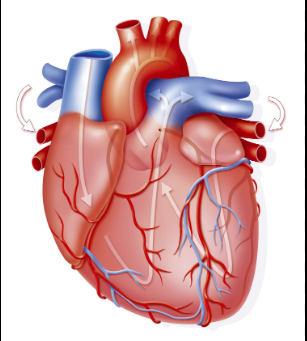

We are going to work with a dataset on heart failure.

The dataset contains medical records of 299 patients who suffered heart failure during a follow-up period.

The 13 clinical characteristics included in the dataset are:

- Age: patient age (years)
- Anemia: decrease in red blood cells or hemoglobin (Boolean)
- High blood pressure: whether the patient has hypertension (boolean)
- Creatinine phosphokinase (CPK): CPK enzyme level in the blood (mcg/L)
- Diabetes: whether the patient has diabetes (boolean)
- Ejection fraction: percentage of blood leaving the heart with each contraction (percentage)
- Platelets: platelets in the blood (kiloplatelets/mL)
- Sex: female or male (binary)
- Serum creatinine: serum creatinine level in the blood (mg/dL)
- Serum sodium: serum sodium level in the blood (mEq/L)
- Smoking: whether the patient smokes or not (boolean)
- Time: follow-up period (days)
- [Objective] Death event: whether the patient died during the follow-up period (Boolean)

In [2]:
from datasets import load_dataset
dataset = load_dataset("mstz/heart_failure")

C:\Users\luisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset["train"]

Dataset({
    features: ['age', 'has_anaemia', 'creatinine_phosphokinase_concentration_in_blood', 'has_diabetes', 'heart_ejection_fraction', 'has_high_blood_pressure', 'platelets_concentration_in_blood', 'serum_creatinine_concentration_in_blood', 'serum_sodium_concentration_in_blood', 'is_male', 'is_smoker', 'days_in_study', 'is_dead'],
    num_rows: 299
})

In [5]:
dataset["train"].features

{'age': Value(dtype='int8', id=None),
 'has_anaemia': Value(dtype='bool', id=None),
 'creatinine_phosphokinase_concentration_in_blood': Value(dtype='float64', id=None),
 'has_diabetes': Value(dtype='bool', id=None),
 'heart_ejection_fraction': Value(dtype='float64', id=None),
 'has_high_blood_pressure': Value(dtype='bool', id=None),
 'platelets_concentration_in_blood': Value(dtype='float64', id=None),
 'serum_creatinine_concentration_in_blood': Value(dtype='float64', id=None),
 'serum_sodium_concentration_in_blood': Value(dtype='float64', id=None),
 'is_male': Value(dtype='bool', id=None),
 'is_smoker': Value(dtype='bool', id=None),
 'days_in_study': Value(dtype='int64', id=None),
 'is_dead': ClassLabel(names=['no', 'yes'], id=None)}

## Part 2: Load the data using pandas

- Convert the Dataset structure into a Pandas DataFrame using pd.DataFrame.
- Separate the dataframe into two different ones, one containing the rows with people who perished
(is_dead=1) and the other with the complement.
- Calculate the averages of the ages of each dataset and print.

In [1]:
import pandas as pd

In [7]:
df = pd.DataFrame(dataset["train"])

In [10]:
df_is_dead = df.query('is_dead == 1')
df_not_dead = df.query('is_dead == 0')

In [12]:
#Calculate the mean age of dead patients
mean_age_dead = df_is_dead["age"].mean()
mean_age_dead

65.20833333333333

In [13]:
#Calculate the mean age of not dead patients
mean_age_not_dead = df_not_dead["age"].mean()
mean_age_not_dead

58.758620689655174

### First conclution:
    Age is a variable that can significantly increase heart attacks

## Part 2: Simples Analytics

1. Verify that the data types are correct in each column (e.g. that there are no numeric columns in string format).
2. Calculate the number of male smokers vs. female smokers (using aggregations in Pandas).

In [18]:
df.dtypes

age                                                  int64
has_anaemia                                           bool
creatinine_phosphokinase_concentration_in_blood    float64
has_diabetes                                          bool
heart_ejection_fraction                            float64
has_high_blood_pressure                               bool
platelets_concentration_in_blood                   float64
serum_creatinine_concentration_in_blood            float64
serum_sodium_concentration_in_blood                float64
is_male                                               bool
is_smoker                                             bool
days_in_study                                        int64
is_dead                                              int64
dtype: object

In [43]:
#calculate the amount of smoker men and smoker women

SmokerManVsWoman = df.query('is_smoker == True').groupby('is_male').count()['age']
SmokerManVsWoman

is_male
False     4
True     92
Name: age, dtype: int64

### Second conclution:
    The number of men who smoke is much higher than the number of women who smoke (92 vs. 4) in this dataset. Although this dataset reflects the real world, such a significant difference between genders could potentially introduce bias.